<a href="https://colab.research.google.com/github/charishmachoppa/i-hub/blob/main/Copy_of_STP_Module_1_Lab_2_Machine_Learning_terms_and_metrics_by_Om.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning terms and metrics

Module 1, Lab 2

In this lab, we will show a part of the ML pipeline by using the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district. We will use the scikit-learn library to load the data and perform some basic data preprocessing and model training. We will also show how to evaluate the model using some common metrics, split the data into training and testing sets, and use cross-validation to get a better estimate of the model's performance.

## Common Machine Learning Evaluation Metrics

### Classification Metrics

**1. Accuracy**
$$\text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}} = \frac{TP + TN}{TP + TN + FP + FN}$$

**2. Precision** (How many predicted positives are actually positive?)
$$\text{Precision} = \frac{TP}{TP + FP}$$

**3. Recall/Sensitivity** (How many actual positives did we find?)
$$\text{Recall} = \frac{TP}{TP + FN}$$

**4. F1-Score** (Harmonic mean of Precision and Recall)
$$\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

Where: **TP** = True Positives, **TN** = True Negatives, **FP** = False Positives, **FN** = False Negatives

### Regression Metrics

**1. Mean Absolute Error (MAE)**
$$\text{MAE} = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$$

**2. Mean Squared Error (MSE)**
$$\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

**3. Root Mean Squared Error (RMSE)**
$$\text{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$$

---

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=42)

In [ ]:
dataset = datasets.fetch_california_housing()
# Dataset description
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Given below are the list of target values. These correspond to the house value derived considering all the 8 input features and are continuous values. We should use regression models to predict these values but we will start with a simple classification model for the sake of simplicity. We need to just round off the values to the nearest integer and use a classification model to predict the house value.

In [ ]:
print("Orignal target values:", dataset.target)

dataset.target = dataset.target.astype(int)

print("Target values after conversion:", dataset.target)
print("Input variables shape:", dataset.data.shape)
print("Output variables shape:", dataset.target.shape)

Orignal target values: [4.526 3.585 3.521 ... 0.923 0.847 0.894]
Target values after conversion: [4 3 3 ... 0 0 0]
Input variables shape: (20640, 8)
Output variables shape: (20640,)


The simplest model to use for classification is the K-Nearest Neighbors model. We will use this model to predict the house value with a K value of 1. We will also use the accuracy metric to evaluate the model.

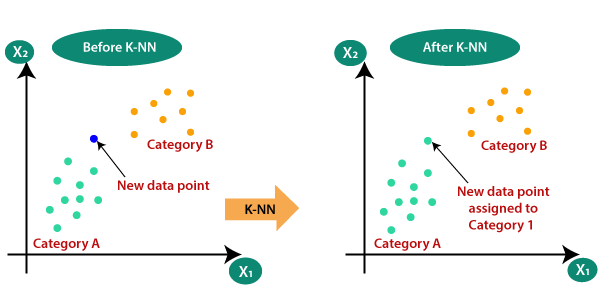

In [ ]:
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features

    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

In [ ]:
import numpy as np

# Training data
traindata = np.array([[1, 2], [2, 3], [3, 3]])
trainlabel = np.array(['A', 'A', 'B'])

# Test data
testdata = np.array([[2, 2], [3, 2]])

# Predictions
pred = NN(traindata, trainlabel, testdata)
print(pred)


['A' 'B']


We will also define a 'random classifier', which randomly allots labels to each sample

In [ ]:
def RandomClassifier(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the random classifier algorithm

    In reality, we don't need these arguments but we are passing them to keep the function signature consistent with other classifiers

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is a random label from the training data
    """

    classes = np.unique(trainlabel)
    rints = rng.integers(low=0, high=len(classes), size=len(testdata))
    predlabel = classes[rints]
    return predlabel

In [ ]:
import numpy as np
rng = np.random.default_rng()  # initialize random generator

traindata = np.array([[1, 2], [2, 3], [3, 4]])
trainlabel = np.array(['A', 'B', 'C'])
testdata = np.array([[5, 6], [7, 8], [9, 10]])

pred = RandomClassifier(traindata, trainlabel, testdata)
print(pred)


['B' 'B' 'C']


We need a metric to evaluate the performance of the model. Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. We will use the accuracy metric to evaluate and compate the performance of the K-Nearest Neighbors model and the random classifier.

In [ ]:
def Accuracy(gtlabel, predlabel):
    """
    This function takes in the ground-truth labels and predicted labels
    and returns the accuracy of the classifier

    gtlabel: numpy array of shape (n,) where n is the number of samples
    predlabel: numpy array of shape (n,) where n is the number of samples

    returns: the accuracy of the classifier which is the number of correct predictions divided by the total number of predictions
    """
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)

In [ ]:
import numpy as np

gt = np.array(['cat', 'dog', 'cat', 'dog'])
pred = np.array(['dog', 'cat', 'cat', 'dog'])

acc = Accuracy(gt, pred)
print("Accuracy:", acc)


Accuracy: 0.5


Let us make a function to split the dataset with the desired probability. We will use this function to split the dataset into training and testing sets. We will use the training set to train the model and the testing set to evaluate the model.

In [ ]:
def split(data, label, percent):
    # generate a random number for each sample
    rnd = rng.random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent

    split1data = data[split1, :]
    split1label = label[split1]
    split2data = data[split2, :]
    split2label = label[split2]
    return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [ ]:
testdata, testlabel, alltraindata, alltrainlabel = split(
    dataset.data, dataset.target, 50 / 100
)
print("Number of test samples:", len(testlabel))
print("Number of train samples:", len(alltrainlabel))
print("Percent of test data:", len(testlabel) * 100 / len(dataset.target), "%")

Number of test samples: 10355
Number of train samples: 10285
Percent of test data: 50.16957364341085 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [ ]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def print_classification_metrics(true_labels, pred_labels):
    """
    Calculate and print classification metrics
    """
    # For multi-class, we'll use macro averaging
    precision = precision_score(true_labels, pred_labels, average='macro', zero_division=0)
    recall = recall_score(true_labels, pred_labels, average='macro', zero_division=0)
    f1 = f1_score(true_labels, pred_labels, average='macro', zero_division=0)
    accuracy = np.mean(true_labels == pred_labels)

    print(f"Accuracy:  {accuracy*100:.2f}%")
    print(f"Precision: {precision*100:.2f}%")
    print(f"Recall:    {recall*100:.2f}%")
    print(f"F1-Score:  {f1*100:.2f}%")

    return accuracy, precision, recall, f1

def print_regression_metrics(true_values, pred_values):
    """
    Calculate and print regression metrics
    """
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    print(f"MAE:  {mae:.4f}")
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")

    return mae, mse, rmse

# Example: Evaluate validation set with multiple metrics
print("=== Validation Set Classification Metrics ===")
valpred = NN(traindata, trainlabel, valdata)
print_classification_metrics(vallabel, valpred)

=== Validation Set Classification Metrics ===
Accuracy:  32.31%
Precision: 23.36%
Recall:    22.68%
F1-Score:  22.93%


(np.float64(0.32306507508663845),
 0.23364923569111118,
 0.2267925787313181,
 0.22927389274914434)

=== Confusion Matrix for Validation Set ===


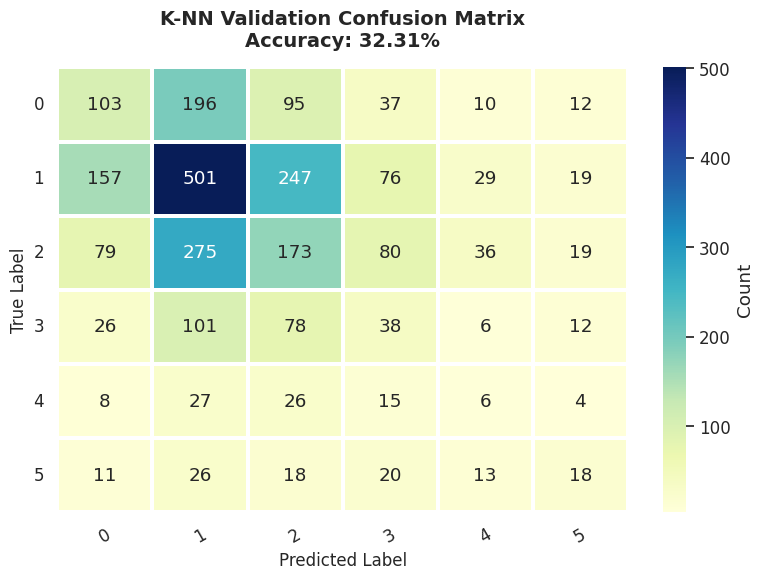

=== Confusion Matrix Summary ===
Classes: [0, 1, 2, 3, 4, 5]
Shape: (6, 6)
Total Predictions: 2597
Accuracy: 32.31%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

def plot_confusion_matrix(true_labels, pred_labels, title="Confusion Matrix"):
    """
    Plots a styled confusion matrix with better colors and readable annotations.
    """

    # Compute confusion matrix and unique classes
    cm = confusion_matrix(true_labels, pred_labels)
    classes = np.unique(np.concatenate((true_labels, pred_labels)))

    # Compute accuracy
    acc = accuracy_score(true_labels, pred_labels)

    # Choose a more vibrant color palette
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.1)
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap="YlGnBu",  # 🌈 Yellow-Green-Blue gradient
        linewidths=1.5,
        linecolor='white',
        xticklabels=classes,
        yticklabels=classes,
        cbar_kws={'label': 'Count'}
    )

    # Titles and labels
    plt.title(f"{title}\nAccuracy: {acc:.2%}", fontsize=14, weight='bold', pad=15)
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.xticks(rotation=30)
    plt.yticks(rotation=0)
    plt.tight_layout()

    # Show plot
    plt.show()

    # Print summary info
    print("=== Confusion Matrix Summary ===")
    print(f"Classes: {classes.tolist()}")
    print(f"Shape: {cm.shape}")
    print(f"Total Predictions: {cm.sum()}")
    print(f"Accuracy: {acc:.2%}")

# Example usage
print("=== Confusion Matrix for Validation Set ===")
valpred = NN(traindata, trainlabel, valdata)
plot_confusion_matrix(vallabel, valpred, title="K-NN Validation Confusion Matrix")



What is the accuracy of our classifiers on the train dataset?

In [ ]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using nearest neighbour algorithm:", trainAccuracy*100, "%")

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using random classifier: ", trainAccuracy*100, "%")

Training accuracy using nearest neighbour algorithm: 100.0 %
Training accuracy using random classifier:  16.96149843912591 %


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case. This is because the random classifier randomly assigns a label to each sample and the probability of assigning the correct label is 1/(number of classes). Let us predict the labels for our validation set and get the accuracy. This accuracy is a good estimate of the accuracy of our model on unseen data.

In [ ]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")


valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 32.30650750866385 %
Validation accuracy using random classifier: 16.59607239122064 %


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. Now let us try another random split and check the validation accuracy. We will see that the validation accuracy changes with the split. This is because the validation set is small and the accuracy is highly dependent on the samples in the validation set. We can get a better estimate of the accuracy by using cross-validation.

In [ ]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 32.50773993808049 %


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [ ]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)

print("Test accuracy:", testAccuracy*100, "%")

Test accuracy: 33.18203766296475 %


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

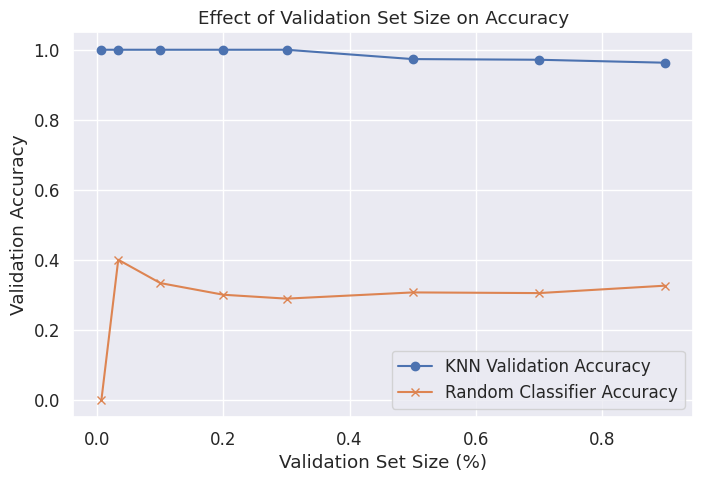

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt

# Load dataset
X, y = load_iris(return_X_y=True)
n_samples = X.shape[0]

# Validation set sizes (number of samples, safe extremes)
val_sizes = [1, 5, 15, 30, 45, 75, 105, 135]  # number of samples
val_percentages = [v / n_samples for v in val_sizes]

# Store results
knn_val_acc = []
rand_val_acc = []

for val_size in val_sizes:
    # Skip invalid splits
    if val_size >= n_samples or val_size <= 0:
        continue

    # Split data
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=val_size, random_state=42
    )

    # KNN classifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    knn_val_acc.append(knn.score(X_val, y_val))

    # Random classifier
    rand = DummyClassifier(strategy='uniform', random_state=42)
    rand.fit(X_train, y_train)
    rand_val_acc.append(rand.score(X_val, y_val))

# Plot results
plt.figure(figsize=(8,5))
plt.plot(val_percentages, knn_val_acc, marker='o', label='KNN Validation Accuracy')
plt.plot(val_percentages, rand_val_acc, marker='x', label='Random Classifier Accuracy')
plt.xlabel('Validation Set Size (%)')
plt.ylabel('Validation Accuracy')
plt.title('Effect of Validation Set Size on Accuracy')
plt.grid(True)
plt.legend()
plt.show()


1.Validation accuracy vs validation size:

-Increasing validation set → KNN accuracy drops slightly (less training data), estimate more reliable.

-Decreasing validation set → KNN accuracy may look higher, but estimate is noisy.

-Random classifier → mostly unaffected, except for very tiny validation sets.

2.Predicting test accuracy:

-Small validation → unstable, high variance → bad prediction.

-Large validation → weak model → underestimates test accuracy.

-Balanced split → best prediction.

3.Good percentage for validation set:

-Usually 20–30% for KNN.

-Random classifier is not sensitive, but same split works for consistency.

> Exercise: Try to implement a 3 nearest neighbour classifier and compare the accuracy of the 1 nearest neighbour classifier and the 3 nearest neighbour classifier on the test dataset. You can use the KNeighborsClassifier class from the scikit-learn library to implement the K-Nearest Neighbors model. You can set the number of neighbors using the n_neighbors parameter. You can also use the accuracy_score function from the scikit-learn library to calculate the accuracy of the model.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)

# Split dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 1-Nearest Neighbour
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
y_pred_1 = knn1.predict(X_test)
acc_1 = accuracy_score(y_test, y_pred_1)

# 3-Nearest Neighbour
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
y_pred_3 = knn3.predict(X_test)
acc_3 = accuracy_score(y_test, y_pred_3)

# Print accuracies
print(f"Accuracy of 1-NN classifier: {acc_1:.2f}")
print(f"Accuracy of 3-NN classifier: {acc_3:.2f}")


Accuracy of 1-NN classifier: 1.00
Accuracy of 3-NN classifier: 1.00


## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>cross-validation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. You can reduce the number of splits to make it faster.

In [ ]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
    """
    This function takes in the data, labels, split percentage, number of iterations and classifier function
    and returns the average accuracy of the classifier

    alldata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    alllabel: numpy array of shape (n,) where n is the number of samples
    splitpercent: float which is the percentage of data to be used for training
    iterations: int which is the number of iterations to run the classifier
    classifier: function which is the classifier function to be used

    returns: the average accuracy of the classifier
    """
    accuracy = 0
    for ii in range(iterations):
        traindata, trainlabel, valdata, vallabel = split(
            alldata, alllabel, splitpercent
        )
        valpred = classifier(traindata, trainlabel, valdata)
        accuracy += Accuracy(vallabel, valpred)
    return accuracy / iterations  # average of all accuracies

In [ ]:
avg_acc = AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, 10, classifier=NN)
print("Average validation accuracy:", avg_acc*100, "%")
testpred = NN(alltraindata, alltrainlabel, testdata)

print("Test accuracy:", Accuracy(testlabel, testpred)*100, "%")

Average validation accuracy: 33.536497388141115 %
Test accuracy: 33.18203766296475 %


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


1.Yes. Validation accuracy from a single random split can fluctuate due to how the data is divided. By performing multiple splits and averaging the results, these fluctuations cancel out, producing a more stable and consistent estimate. This is especially useful for small datasets where a single split might be unrepresentative. Essentially, repeated validation reduces the effect of randomness in the splitting process and ensures the reported accuracy reflects the model’s expected performance across different subsets of the data.


2.Generally, yes. Averaging over multiple splits reduces variance caused by random train/validation divisions. The mean of these accuracies tends to be closer to the true expected accuracy on unseen test data. This approach helps avoid misleading results from a single split that may overestimate or underestimate performance. The more iterations used, the closer the averaged validation accuracy aligns with the expected test accuracy, giving a more reliable prediction of how the model will perform on real-world, unseen data.


3.Increasing the number of iterations generally improves the accuracy estimate. Low iterations can still leave high variability due to random splits. As the number of repetitions increases, fluctuations average out, and the mean validation accuracy stabilizes, providing a more precise estimate of expected test performance. However, after a certain point, additional iterations give diminishing returns because the estimate has already converged. While more iterations stabilize the estimate, they cannot compensate for a fundamentally small or weak training dataset in terms of improving actual model performance.


4.Partially. For very small validation datasets, averaging over many iterations improves the stability of accuracy estimates, making results less noisy. However, for very small training datasets, increasing iterations cannot improve model performance, as the model is limited by the lack of data to learn from. Iterations only stabilize the evaluation, not the learning process. Therefore, repeated validation helps produce a more reliable estimate of test accuracy, but it cannot replace having sufficient training data, which is essential for good predictive performance.

> Exercise: How does the accuracy of the 3 nearest neighbour classifier change with the number of splits? How is it affected by the split size? Compare the results with the 1 nearest neighbour classifier.

1.Effect of the number of splits on 3-NN accuracy

-When you increase the number of splits (e.g., in repeated random train/validation splits or k-fold cross-validation), the average validation accuracy becomes more stable.

-Individual splits may show fluctuations because different subsets may contain easier or harder samples, but averaging over many splits reduces this variance.

-3-NN benefits more than 1-NN in terms of stability because it smooths out noise by majority voting among 3 neighbors.



2.Effect of split size on 3-NN accuracy

-Smaller validation split (larger training set) → 3-NN has more training data → better model → higher accuracy.

-Larger validation split (smaller training set) → 3-NN has less data to learn → accuracy drops slightly.

-Very small validation sets can give noisy estimates (high variance), while very large validation sets may underestimate performance due to less training data.


3.
-The 1-NN classifier is very sensitive to individual data points. Its accuracy can fluctuate significantly across different splits, especially if the training set is small or contains outliers. Small changes in the data can strongly affect its predictions, making it less stable.

-The 3-NN classifier, on the other hand, is more robust because it predicts labels based on the majority vote of three nearest neighbors. This averaging reduces the impact of noisy or atypical points, making its accuracy more stable across splits. While both classifiers’ accuracies drop if the training set becomes too small, 3-NN generally maintains better performance and consistency than 1-NN.